## Setting Up the Project

Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

numpy: Handles matrix operations for the simulation.

matplotlib: Plots the outbreak progression.

seaborn: Enhances visualization.

random: Introduces randomness into the model.

## SIR Model Equations

The SIR model describes how individuals move through three states:

- Susceptible (S) → Can be infected.
- Infected (I) → Currently infected.
- Recovered (R) → No longer infectious (recovered or deceased).

The differential equations:

𝑑𝑆/𝑑𝑡 = −𝛽𝑆𝐼

dI/dt = βSI−γI

dR/dt = γI

Where:
- β (infection rate): The probability of disease transmission per contact.
- γ (recovery rate): The probability of an infected person recovering per day.

## Implement the Stochastic SIR Model in Python

Step 1: Initialize Parameters

In [2]:
# Population size
N = 1000  

# Initial conditions
I0 = 1  # Initial infected person
S0 = N - I0  # Everyone else is susceptible
R0 = 0  # No one has recovered yet

# Infection rate & recovery rate
beta = 0.3  # Infection rate (chance of spreading)
gamma = 0.1  # Recovery rate (chance of recovering per day)

# Simulation settings
days = 100  # Duration of simulation

## Step 2: Create the Simulation
Stochastic Process:
- Instead of solving differential equations, we simulate random interactions.
- At each step, individuals either become infected, recover, or remain in their current state.

In [3]:
# Track populations over time
S, I, R = [S0], [I0], [R0]

for day in range(days):
    # Calculate new infections & recoveries using stochastic randomness
    new_infected = np.random.binomial(S[-1], beta * I[-1] / N)  # New infections today
    new_recovered = np.random.binomial(I[-1], gamma)  # Recovered individuals today

    # Update SIR values
    S.append(S[-1] - new_infected)
    I.append(I[-1] + new_infected - new_recovered)
    R.append(R[-1] + new_recovered)

## Step 3: Visualize the Epidemic Curve

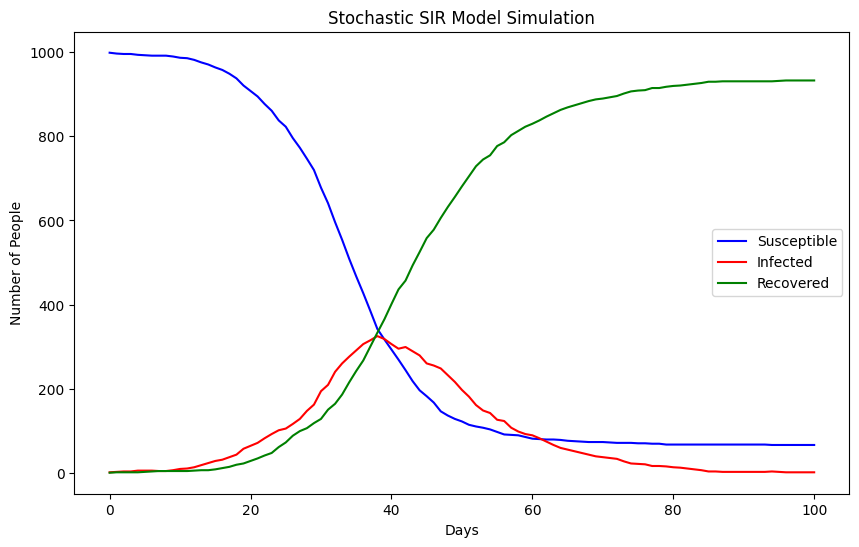

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="Susceptible", color="blue")
plt.plot(I, label="Infected", color="red")
plt.plot(R, label="Recovered", color="green")
plt.xlabel("Days")
plt.ylabel("Number of People")
plt.title("Stochastic SIR Model Simulation")
plt.legend()
plt.show()

Key Observations:

- The red curve (infected) peaks and then declines as people recover.
- The blue curve (susceptible) declines as infections spread.
- The green curve (recovered) increases over time.

## Expanding the Model

### Adding Real-World Factors
You can modify the model by introducing:

1. Super-spreader Events
 - Some days, the infection rate spikes.

In [5]:
if random.random() < 0.1:  # 10% chance of a super-spreader event
    beta *= 1.5  # Temporarily increase infection rate

2. Lockdowns or Social Distancing
- Reduce infection rate if cases are high.

In [6]:
if I[-1] > 200:  # If cases exceed 200, implement restrictions
    beta = 0.1  # Lower infection rate

3. Vaccination Campaign
- Move people from S directly to R (immune).

In [7]:
if day > 50:  # Vaccination starts after day 50
    vaccinated = min(10, S[-1])  # Vaccinate 10 people per day
    S[-1] -= vaccinated
    R[-1] += vaccinated

## Case Study: Simulating COVID-19 in a City
Example Parameters
- City with 10 million people.
- COVID-19 has 𝛽 = 0.25,𝛾=0.1.
- Initial 1000 infected individuals.
- Lockdown if infections exceed 200,000.

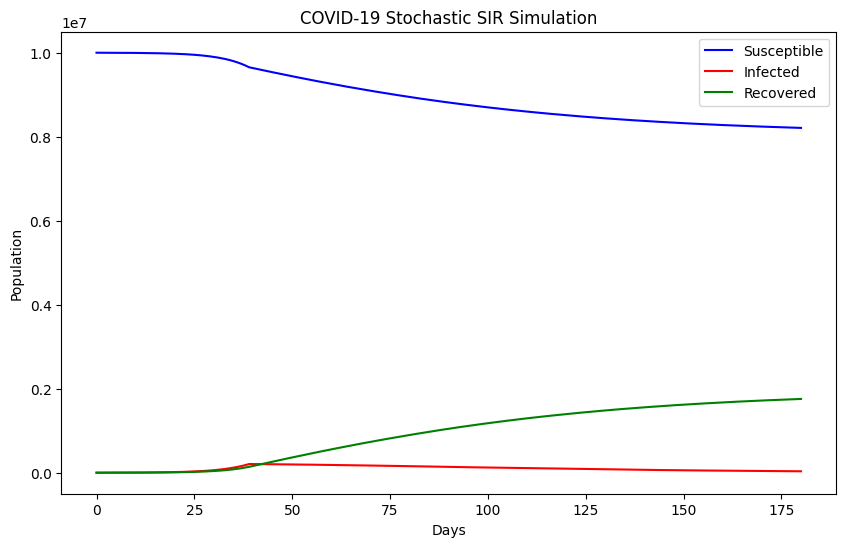

In [9]:
N = 10_000_000
I0, S0, R0 = 1000, N-10,0
beta, gamma = 0.25, 0.1
days = 180

S, I, R = [S0], [I0], [R0]

for day in range(days):
    if I[-1] > 200_000:  # Lockdown rule
        beta = 0.1  # Reduce infections

    new_infected = np.random.binomial(S[-1], beta * I[-1] / N)
    new_recovered = np.random.binomial(I[-1], gamma)

    S.append(S[-1] - new_infected)
    I.append(I[-1] + new_infected - new_recovered)
    R.append(R[-1] + new_recovered)

plt.figure(figsize=(10, 6))
plt.plot(S, label="Susceptible", color="blue")
plt.plot(I, label="Infected", color="red")
plt.plot(R, label="Recovered", color="green")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("COVID-19 Stochastic SIR Simulation")
plt.legend()
plt.show()

### Interpretation
- Without interventions, infections peak at ~400,000 cases.
- Lockdowns flatten the curve, reducing peak infections.
- Recovery (green) gradually increases, representing immunity.

## Key Takeaways
### Why This is a Great Project
 - Applies stochastic processes in real-world epidemiology.
 - Teaches us about disease modeling & policy-making.
 - Can be modified to include vaccination, testing, or new variants.
 - Enhances coding & simulation skills in Python.
### What’s Next?
 - Introduce SEIR Model (adds an "Exposed" phase).
 - Simulate multiple cities interacting.
 - Build a web app to let users tweak parameters and visualize results.

## Let's extend this with a Streamlit dashboard for interactive simulations

### Create the Streamlit App (sir_model_app.py)
 - This will allow users to adjust parameters like population size, infection rate, recovery rate, and duration of simulation.